##### Copyright 2022 Jing Wang.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License. 


# Classification with using scikit learn

#### 4 Nov 2022, COMP-1801 IT lab Part 2 

####$\newcommand{\Mat}[1]{\boldsymbol{#1}}$ In this notebook, we will apply logistic regression (although the name has 'regression', it is a classification algorithm), SVM and Decision Tree by using scikit learn.

 ## Note: to execute a cell, press SHIFT + ENTER

## Import libraries: Do not forget!

In [1]:
# Import NumPy, which can deal with multi-dimensional arrays such as matrix intuitively.
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import sklearn.linear_model, sklearn.datasets
from sklearn.preprocessing import StandardScaler


### Load the dataset and show


In [12]:
# Load the breast cancer dataset
dataset = sklearn.datasets.load_breast_cancer()
raw_X_df = pd.DataFrame(data=dataset['data'], columns=dataset['feature_names'])
raw_y_df = pd.DataFrame(data=1 - (dataset['target']), columns=['target'])
raw_df = pd.concat([raw_X_df, raw_y_df], axis=1)
# Shuffle dataset
rng = np.random.default_rng(0)
Xy_df = raw_df.iloc[rng.permutation(len(raw_df))].reset_index(drop=True)

Xy_df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,14.25,21.72,93.63,633.0,0.09823,0.10980,0.13190,0.05598,0.1885,0.06125,...,30.36,116.20,799.6,0.1446,0.4238,0.51860,0.14470,0.3591,0.10140,1
1,15.73,11.28,102.80,747.2,0.10430,0.12990,0.11910,0.06211,0.1784,0.06259,...,14.20,112.50,854.3,0.1541,0.2979,0.40040,0.14520,0.2557,0.08181,0
2,19.55,23.21,128.90,1174.0,0.10100,0.13180,0.18560,0.10210,0.1989,0.05884,...,30.44,142.00,1313.0,0.1251,0.2414,0.38290,0.18250,0.2576,0.07602,1
3,13.87,16.21,88.52,593.7,0.08743,0.05492,0.01502,0.02088,0.1424,0.05883,...,25.58,96.74,694.4,0.1153,0.1008,0.05285,0.05556,0.2362,0.07113,0
4,17.46,39.28,113.40,920.6,0.09812,0.12980,0.14170,0.08811,0.1809,0.05966,...,44.87,141.20,1408.0,0.1365,0.3735,0.32410,0.20660,0.2853,0.08496,1


In [7]:
Xy_df.shape

(569, 31)

### Convert the data to NumPy ndarrays.

In [24]:
# prepare NumPy ndarrays
X = np.array(Xy_df[dataset['feature_names'][0:2]]) # we only use the first two columns
y = np.array(Xy_df['target'])

n_train_points = 540
n_new_points = 20

# Split the data into training/new data
raw_X_train = X[:n_train_points]
raw_X_new = X[n_train_points:n_train_points+n_new_points]

# Split the targets into training/new data
y_train = y[:n_train_points]
y_new = y[n_train_points:n_train_points+n_new_points]


In [25]:
X.shape

(569, 2)

###Standardization

In [26]:
scaler = StandardScaler()
scaler.fit(raw_X_train) # calculate the mean and variance for each feature and store to attributes

X_train = scaler.transform(raw_X_train) # standardize X_train
X_new=scaler.transform(raw_X_new)

###**Method 1:logistic Regression**

##**Task 1**: Using logistic regression models.

### Fit and predict (MODIFY CODES)

In [27]:
# Modify the code - Create logistic regression object:start
log_reg = sklearn.linear_model.LogisticRegression(fit_intercept=True)


# Modify the code - Train the model using the training data:start
log_reg.fit(X_train, y_train)

# Modify the code - Make predictions (y_new_pred) using the testing data (X_new)
y_new_pred = log_reg.predict(X_new)

### Plot outputs

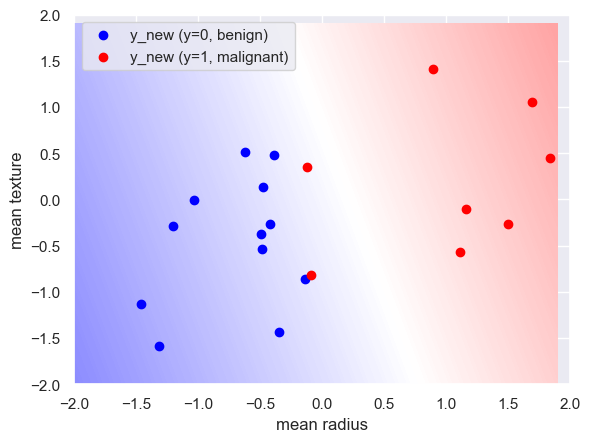

In [28]:
# Plot outputs
xrange = [-2, 2]
yrange = [-2, 2]
step = 0.1
x = np.arange(xrange[0], xrange[1], step)
y = np.arange(yrange[0], yrange[1], step)
xx, yy = np.meshgrid(x, y)
z = - scipy.special.logit(log_reg.predict_proba(np.c_[xx.reshape([-1]), yy.reshape([-1])])[:, 0].reshape(xx.shape))
plt.contourf(xx, yy, z, cmap='bwr', vmin=-20.0, vmax=20.0, levels=200)

X_new_neg = X_new[y_new==0, :]
X_new_pos = X_new[y_new==1, :]
plt.scatter(X_new_neg[:, 0], X_new_neg[:, 1],  color='blue', label='y_new (y=0, benign)')
plt.scatter(X_new_pos[:, 0], X_new_pos[:, 1],  color='red', label='y_new (y=1, malignant)')

plt.xlim(xrange)
plt.ylim(yrange)

plt.xlabel(dataset['feature_names'][0])
plt.ylabel(dataset['feature_names'][1])

plt.legend()

plt.show()

### Score function and classification results
- Score: the higher, the better. 

Accuracy: 0.9000
Confusion matrix:  [[0.6 0. ]
 [0.1 0.3]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92        12
           1       1.00      0.75      0.86         8

    accuracy                           0.90        20
   macro avg       0.93      0.88      0.89        20
weighted avg       0.91      0.90      0.90        20



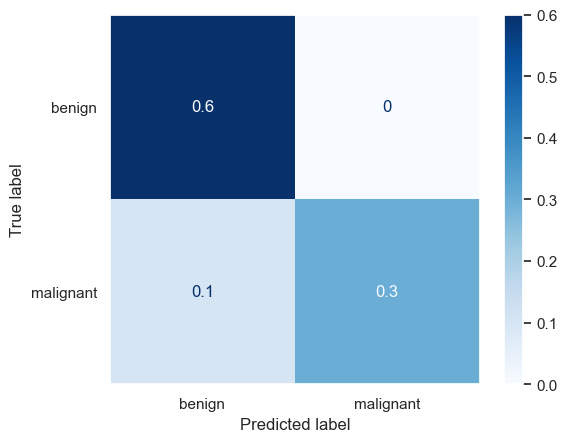

In [29]:
# The accuracy score: 1 for perfect prediction
print('Accuracy: {:.4f}'.format(sklearn.metrics.accuracy_score(y_new_pred, y_new)))
# Confusion matrix
confusion_mat = sklearn.metrics.confusion_matrix(y_new, y_new_pred, normalize='all')
print('Confusion matrix: ', confusion_mat)
# Visualize the confusion matrix
sklearn.metrics.ConfusionMatrixDisplay(confusion_mat, display_labels=['benign', 'malignant']).plot(cmap=plt.cm.Blues)
plt.grid(False)
# The classification report, which contains accuracy, precision, recall, F1 score
print(sklearn.metrics.classification_report(y_new, y_new_pred))

## **NOTE** :Please check the accuracy score of logistic regression, it is around/over 90%?

###   If yes, congratulations! You beat my score!
###   If no, you might fogot to tune the hyperparaters, so please go back to 'Fit and Predict' session to edit your code.





# Let's use other types of machine learning methods!


## **TASK 2** :Using SVM models. I got 85% accuracy score of SVM. Can you beat me?

##**Method 2: SVM**


##Fit and predict

In [30]:
svm = sklearn.svm.SVC()

svm.fit(X_train, y_train)

svm.predict(X_new)

array([1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0])

##Plot outputs

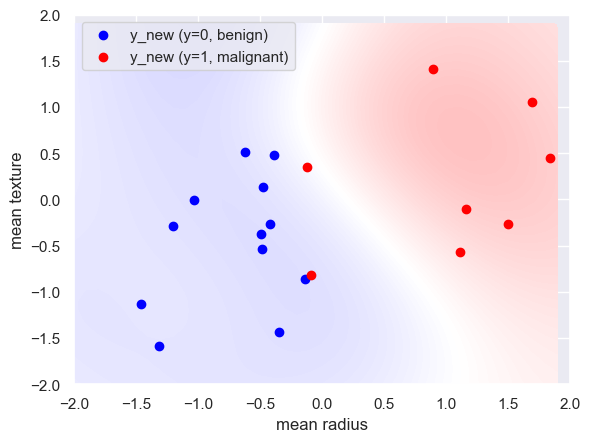

In [36]:
# Plot outputs

xrange = [-2, 2]
yrange = [-2, 2]
step = 0.1
x = np.arange(xrange[0], xrange[1], step)
y = np.arange(yrange[0], yrange[1], step)
xx, yy = np.meshgrid(x, y)
svm.set_params(decision_function_shape='ovo')
z = svm.decision_function(np.c_[xx.reshape([-1]), yy.reshape([-1])]).reshape(xx.shape)
plt.contourf(xx, yy, z, cmap='bwr', vmin=-10.0, vmax=10.0, levels=200)

X_new_neg = X_new[y_new==0, :]
X_new_pos = X_new[y_new==1, :]
plt.scatter(X_new_neg[:, 0], X_new_neg[:, 1],  color='blue', label='y_new (y=0, benign)')
plt.scatter(X_new_pos[:, 0], X_new_pos[:, 1],  color='red', label='y_new (y=1, malignant)')

plt.xlim(xrange)
plt.ylim(yrange)

plt.xlabel(dataset['feature_names'][0])
plt.ylabel(dataset['feature_names'][1])

plt.legend()

plt.show()
%matplotlib inline

Accuracy: 0.9000
Confusion matrix:  [[0.6 0. ]
 [0.1 0.3]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92        12
           1       1.00      0.75      0.86         8

    accuracy                           0.90        20
   macro avg       0.93      0.88      0.89        20
weighted avg       0.91      0.90      0.90        20



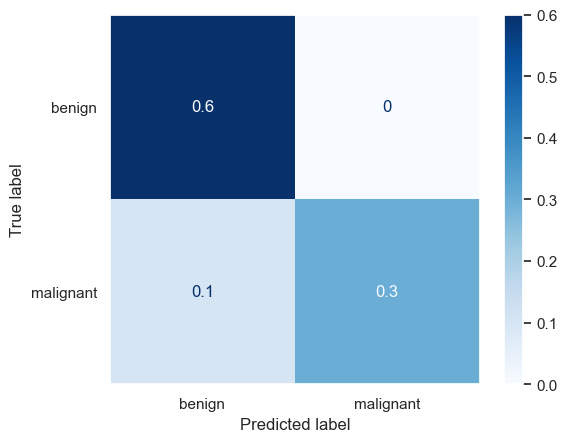

In [31]:
# The accuracy score: 1 for perfect prediction
print('Accuracy: {:.4f}'.format(sklearn.metrics.accuracy_score(y_new, svm.predict(X_new))))
# Confusion matrix
confusion_mat = sklearn.metrics.confusion_matrix(y_new, svm.predict(X_new), normalize='all')
print('Confusion matrix: ', confusion_mat)
# Visualize the confusion matrix
sklearn.metrics.ConfusionMatrixDisplay(confusion_mat, display_labels=['benign', 'malignant']).plot(cmap=plt.cm.Blues)
plt.grid(False)
# The classification report, which contains accuracy, precision, recall, F1 score
print(sklearn.metrics.classification_report(y_new, svm.predict(X_new)))


<!--  -->

## **TASK 3** :Using Decision Tree models. Although you have not learned Decision Tree, can you implement it? Can you achieve 90% accuracy score? 

## **Method 3: Decison Tree**

##Fit and predict

In [32]:
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn import tree
clf = dtc(max_depth=4, random_state=40)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=40)

In [33]:
predict_y = clf.predict(X_new)

Accuracy: 0.9500
Confusion matrix:  [[0.6  0.  ]
 [0.05 0.35]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.88      0.93         8

    accuracy                           0.95        20
   macro avg       0.96      0.94      0.95        20
weighted avg       0.95      0.95      0.95        20



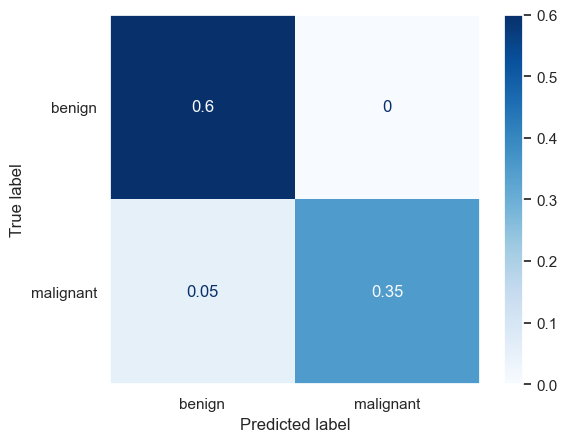

In [34]:
# The accuracy score: 1 for perfect prediction
print('Accuracy: {:.4f}'.format(sklearn.metrics.accuracy_score(y_new, clf.predict(X_new))))

# Confusion matrix
confusion_mat = sklearn.metrics.confusion_matrix(y_new, clf.predict(X_new), normalize='all')
print('Confusion matrix: ', confusion_mat)

# Visualize the confusion matrix
sklearn.metrics.ConfusionMatrixDisplay(confusion_mat, display_labels=['benign', 'malignant']).plot(cmap=plt.cm.Blues)
plt.grid(False)

# The classification report, which contains accuracy, precision, recall, F1 score
print(sklearn.metrics.classification_report(y_new, clf.predict(X_new)))